### Task 4: TSF

#### Anupam Prakash

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Importing libraries

### Importing DataSets

In [5]:
data= pd.read_csv('iris.csv')
data.set_index('Id',drop=True,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info() #to check null values and variables type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.describe() #give basis visualization only on numerical values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data_species=data.drop(['Species'],axis=1) #Copyong all column except "Species"
data_species.head() #return first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Data Visualization 

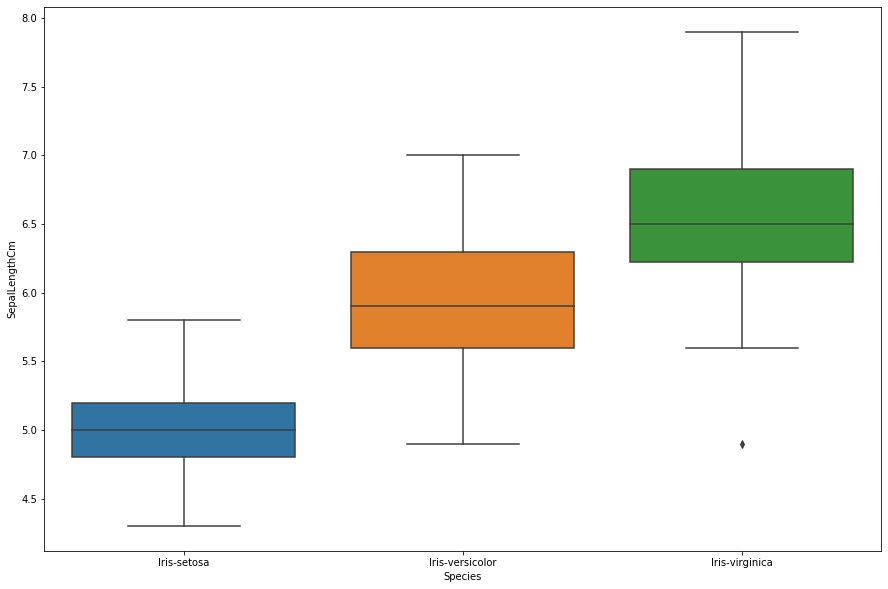

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data['Species'],y=data['SepalLengthCm'],data=data)
plt.show()

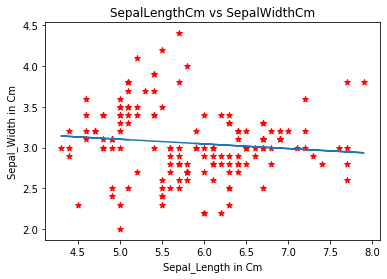

In [15]:
#data.plot(x='SepalLengthCm', y='SepalWidthCm', style='*',grid=True)  
m, b = np.polyfit(data['SepalLengthCm'],data['SepalWidthCm'], 1) #here m is slope
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c='red', marker='*')  # we can also do it by saving variable SepalLengthCm in X variable first
plt.plot(data['SepalLengthCm'], m*data['SepalLengthCm']+ b)
plt.title('SepalLengthCm vs SepalWidthCm')  
plt.xlabel('Sepal_Length in Cm')  
plt.ylabel('Sepal_Width in Cm')  
plt.show()

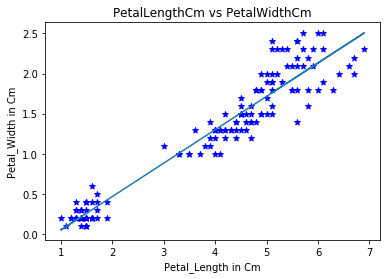

In [16]:
m, b = np.polyfit(data['PetalLengthCm'],data['PetalWidthCm'], 1) #here m is slope
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c='blue', marker='*')  # we can also do it by saving variable PetalLengthCm in X variable first
plt.plot(data['PetalLengthCm'], m*data['PetalLengthCm']+ b)
plt.title('PetalLengthCm vs PetalWidthCm')  
plt.xlabel('Petal_Length in Cm')  
plt.ylabel('Petal_Width in Cm')  
plt.show()

#### Splitting Data into Train and Test

In [22]:
X=data_species
y=data['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
print('Train input contains',X_train.shape, end=" Rows and columns")
print()
print('Test input contains', X_test.shape, end=" Rows and columns")
print()
print('Train Output Contains',y_train.shape, end=" Rows and columns") 
print()
print('Test Output Contains',y_test.shape, end=" Rows and columns")

Train input contains (105, 4) Rows and columns
Test input contains (45, 4) Rows and columns
Train Output Contains (105,) Rows and columns
Test Output Contains (45,) Rows and columns

### Applying Algorithm to Train Model

In [24]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)
pred=dec.predict(X_test)

In [25]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9777777777777777
confusion_matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Accuracy and Confusion Matrix

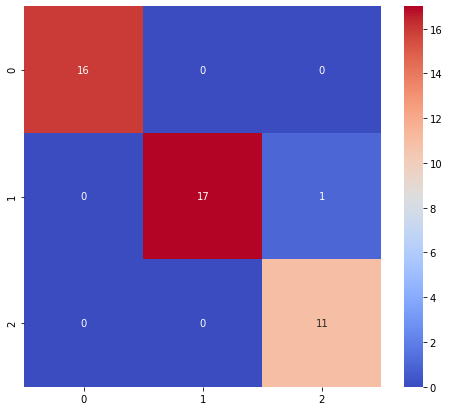

In [28]:
plt.figure(figsize=(8,7))
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)
plt.show()

### Predicting

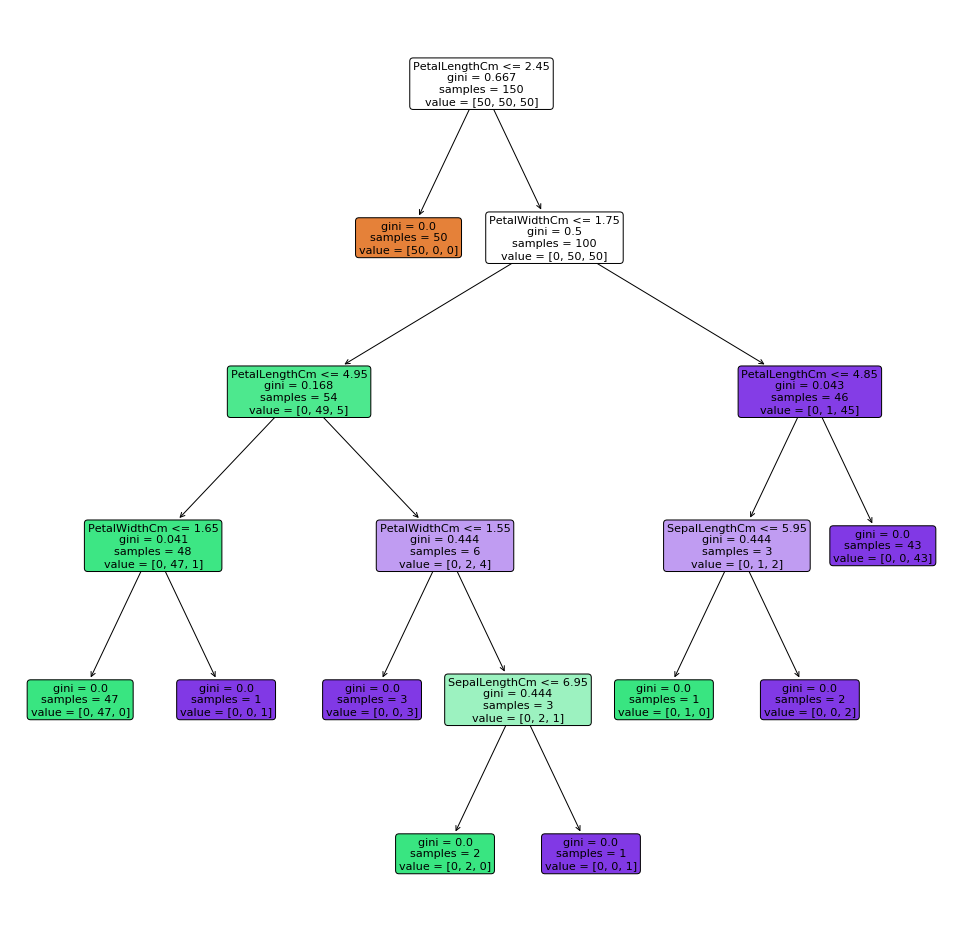

In [36]:
coloum=list(data_species.columns)
plt.figure(figsize=(17,17))
plot_tree(dec.fit(X,y),feature_names=coloum,filled=True,rounded=True)
plt.show()